# Bitmask to RLE annotation
This notebook contains functions that allow us to transform bitmasks to polygonal annotations in COCO format
## Main code (just for one instance per image, for more than one see bit_to_poly.ipynb)

In [29]:
from PIL import Image # (pip install Pillow)
import matplotlib.pyplot as plt
import numpy as np                                 # (pip install numpy)
from skimage import measure                        # (pip install scikit-image)
from shapely.geometry import Polygon, MultiPolygon # (pip install Shapely)
import cv2
import os

In [30]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

def mask_to_annotation(img_path, img_id, img_cat, ann_id, is_crowd):
    gt_mask = cv2.imread(img_path,0)
    fortran_gt_mask = np.asfortranarray(gt_mask)
    encoded_ground_truth = mask.encode(fortran_gt_mask)
    ground_truth_area = mask.area(encoded_ground_truth)
    ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
    # contours = measure.find_contours(ground_truth_binary_mask, 0.5)
    #Decoding byte format encoded_ground_truth['counts'] into utf-8
    encoded_ground_truth['counts'] = encoded_ground_truth['counts'].decode('utf-8')
    annotation = {
            "segmentation": encoded_ground_truth,
            "area": ground_truth_area.tolist(),
            "iscrowd": is_crowd,
            "image_id": img_id,
            "bbox": ground_truth_bounding_box.tolist(),
            "category_id": img_cat,
            "id": ann_id
        }
        
    
    return annotation

In [33]:
def images_to_annotations(dir_path):
    #Initializing images and annotations lists
    images=[]
    annotations = []
    img_names = os.listdir(dir_path)
    img_names.sort()
    img_license = 0
    img_id=0
    ann_id=0
    is_crowd=0
           
    for img_name in img_names:
        print(img_name)
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path,0)
        img_size = img.shape
        
        img_cat = 1
        annotation = mask_to_annotation(img_path , img_id, img_cat, ann_id, is_crowd)
        annotations.append(annotation)
        ann_id+=1
            

        new_img={}
        new_img["license"] = img_license
        new_img["file_name"] = img_name.split(".")[0]+".png" #Changed to match the video images
        new_img["width"] = img_size[1]
        new_img["height"] = img_size[0]
        new_img["id"] = img_id
        images.append(new_img)

        # sub_masks = create_sub_masks()
        # for color, sub_mask in sub_masks.items():
        #     plt.imshow(sub_mask)
        #     plt.show()
        
        img_id+=1

    return annotations,images





In [32]:
my_dict = {}
color2cat={"[255 255 255]": 1}
info = {
      "description":"Test Dataset",
      "url":"",
      "version":"0.1",
      "year":2020,
      "contributor":"Josmar Suarez",
      "date_created":"2020/07/14"
   }

licenses = [{
        "url": "",
        "id": 0,
        "name": "Attribution-NonCommercial-ShareAlike License"
    }]
categories = [
      {
         "supercategory":"person",
         "id":1,
         "name":"person"
      }
   ]

In [34]:
dir_path = "/home/josmar/proyectos/codes/annotation_tools/background_substraction/bin_close_images/input"
# dir_path = '/home/josmar/proyectos/codes/datasets/casia_B1_silhouettes'
anns,imgs = images_to_annotations(dir_path)

my_dict["info"]= info
my_dict["licenses"]= licenses
my_dict["images"]=imgs
my_dict["categories"]=categories
my_dict["annotations"]=anns

000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png
019.png
020.png
021.png
022.png
023.png
024.png
025.png
026.png
027.png
028.png
029.png
030.png
031.png
032.png
033.png
034.png
035.png
036.png
037.png
038.png
039.png
040.png
041.png
042.png
043.png
044.png
045.png
046.png
047.png
048.png
049.png
050.png
051.png
052.png
053.png
054.png
055.png
056.png
057.png
058.png
059.png
060.png
061.png
062.png
063.png
064.png
065.png
066.png
067.png
068.png
069.png
070.png
071.png
072.png
073.png
074.png
075.png
076.png
077.png
078.png
079.png
080.png
081.png
082.png
083.png
084.png
085.png
086.png
087.png
088.png
089.png
090.png
091.png
092.png
093.png
094.png
095.png
096.png
097.png
098.png
099.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png


In [38]:
import json 
with open('RLE_ENCODED.json', 'w') as fp:
    json.dump(my_dict, fp)

In [37]:
ground_truth_binary_mask = cv2.imread('/home/josmar/proyectos/codes/annotation_tools/background_substraction/bin_close_images/input/001.png',0)
fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
print(encoded_ground_truth)
encoded_ground_truth['counts'] = encoded_ground_truth['counts'].decode('utf-8')

print(encoded_ground_truth)



{'size': [720, 1280], 'counts': b'bYVe01^f02O6J001O000O1000000O10000O1N3N10000O10000]OGnZO:Pe0InZO7Qe0e0N2gLnN`_O3IR1e`0oN]_O3KP1e`0QOZ_Of2m;nLcG?]Lf2m;PM`G?_Ld2P<oLaCH\\3i0oLd2T<\\MgF4PMe2X<\\MhD[OKg0ROe2[<[M^DKH8\\Od2^<\\MXD:\\OP4\\<iKkC]6V<dIhC^6X<cIeC_6Z<bIeC_6[<aIdC`6\\<`IdC_6\\<cIbC^6^<bIaC_6^<cI`C^6`<cI_C]6a<dI]C\\6d<h1O^O`CTGb<k8b0H7I8F:YOg0N2000000001O1O1O001O1O01]I]AX5b>fJaAY5`>eJcAZ5]>dJdA]5]>`JeA_5`>YJdAg5_>SJcAn5b>iIaAm4\\OULP`0[3R@eK1P1l?Z3U@bK3T1g?Z3e@eL\\?Z3e@fL[?Y3j@cLV?\\3l@bLU?]3l@cLT?[3n@eLR?Z3o@fLQ?X3QAgLP?W3RAiLn>V3RAkLn>R3UAnLk>Y2W@RMP1e0i>S2TBlMm=P2VBQNj=h1]BXNc=d1aB\\N_=\\1iBdNY=Q1PCoNR=2jCO\\a000000000000O10O100O100O10O11N0100P[OXOXd0g0e[O\\O[d0e0a[O]Oad0f0X[O\\Oid0U11O00001N1O1O2N101N1O2N1M4I6L5M2M4N2N2M3M5JT]m3'}
{'size': [720, 1280], 'counts': 'bYVe01^f02O6J001O000O1000000O10000O1N3N10000O10000]OGnZO:Pe0InZO7Qe0e0N2gLnN`_O3IR1e`0oN]_O3KP1e`0QOZ_Of2m;nLcG?]Lf2m;PM`G?_Ld2P<oLaCH\\3i0oLd2T<\\MgF4PMe2X<\\MhD[OKg0ROe2[<[M^DKH8\\Od2^<\\MXD:\\OP4\\<iKkC]6V<dIhC^6X

In [47]:
import numpy as np
from itertools import groupby

def binary_mask_to_rle(binary_mask):
    rle = {'counts': [], 'size': list(binary_mask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(binary_mask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    return rle

ground_truth_binary_mask = cv2.imread('/home/josmar/proyectos/codes/annotation_tools/background_substraction/bin_close_images/input/001.png',0)

fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
rle = binary_mask_to_rle(fortran_ground_truth_binary_mask)
print(rle)

{'counts': [694578, 1, 718, 3, 717, 9, 711, 9, 711, 10, 710, 10, 710, 10, 709, 11, 709, 11, 709, 11, 709, 11, 708, 12, 708, 12, 708, 12, 707, 13, 705, 16, 703, 17, 703, 17, 703, 17, 702, 18, 702, 18, 702, 18, 683, 9, 9, 19, 681, 12, 7, 19, 680, 40, 678, 42, 573, 8, 45, 11, 38, 44, 1, 571, 12, 40, 15, 35, 46, 1, 568, 16, 34, 101, 1, 415, 4, 146, 19, 31, 104, 1, 412, 9, 140, 24, 27, 107, 1, 411, 11, 12, 3, 120, 28, 23, 112, 411, 28, 114, 32, 18, 117, 410, 33, 50, 12, 45, 35, 15, 120, 410, 35, 40, 30, 32, 38, 12, 122, 410, 38, 34, 48, 14, 176, 410, 41, 21, 246, 411, 42, 19, 248, 411, 43, 16, 250, 410, 44, 15, 251, 410, 44, 14, 251, 1, 410, 44, 14, 251, 410, 46, 12, 252, 410, 46, 11, 253, 409, 48, 9, 254, 409, 49, 8, 254, 409, 50, 6, 254, 410, 310, 409, 292, 9, 8, 411, 291, 429, 283, 436, 276, 444, 266, 454, 243, 477, 241, 479, 241, 479, 241, 479, 241, 479, 241, 479, 242, 478, 243, 477, 244, 476, 244, 476, 245, 475, 246, 474, 246, 475, 35, 8, 203, 474, 33, 11, 202, 475, 31, 14, 201, 475, 2

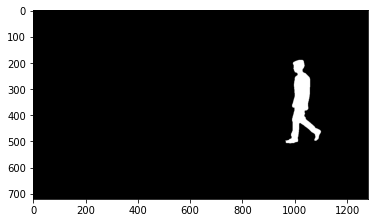

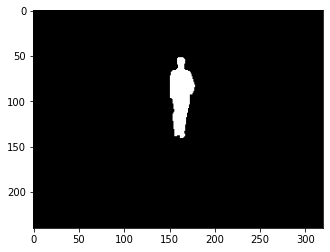

In [26]:
img = cv2.imread('/home/josmar/proyectos/codes/annotation_tools/background_substraction/bin_close_images/input/001.png')
img_casia = cv2.imread('/home/josmar/proyectos/codes/datasets/casia_B1_silhouettes/062-nm-06-180-118.png')

# h,w, _ = img.shape
# new_img =np.zeros((h, w, 3), np.uint8)
# for i in range (h):
#     for j in range (w):
#         if img[i][j]==0:
#             new_img[i][j] = (0, 255, 0)
plt.imshow(img)
plt.show()
plt.imshow(img_casia)
plt.show()
        

In [28]:
print(np.unique(img.reshape(-1, img.shape[-1]), axis=0, return_counts=True))
print(np.unique(img_casia.reshape(-1, img.shape[-1]), axis=0, return_counts=True))

(array([[  0,   0,   0],
       [255, 255, 255]], dtype=uint8), array([905284,  16316]))
(array([[  0,   0,   0],
       [255, 255, 255]], dtype=uint8), array([75283,  1517]))


## trying other methods

### Could be found at:
https://github.com/cocodataset/cocoapi/issues/131